# Data Preprocessing for Linear Regression

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import os
path='/content/drive/My Drive/AI project/'
os.chdir(path)


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv('corona_virus.csv', encoding="ISO-8859-1")
data.head()

,"Country,Other",Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population
0,USA,"10,66,27,427",NaN,"11,59,824",NaN,"10,45,49,551",NaN,"9,18,052","1,368","3,18,476","3,464","1,17,68,34,935","35,14,983","33,48,05,269"
1,India,"4,49,39,515",NaN,"5,31,508",NaN,"4,43,56,693",NaN,"51,314",NaN,"31,948",378,"92,64,96,579","6,58,663","1,40,66,31,776"
2,France,"3,99,80,570",NaN,"1,66,556",NaN,"3,96,77,000",NaN,"1,37,014",869,"6,09,604","2,540","27,14,90,188","41,39,547","6,55,84,518"
3,Germany,"3,84,03,667",NaN,"1,73,044",NaN,"3,81,92,900",600,"37,723",NaN,"4,57,821","2,063","12,23,32,384","14,58,359","8,38,83,596"
4,Brazil,"3,74,49,418",NaN,"7,01,494",NaN,"3,62,49,161",NaN,"4,98,763",NaN,"1,73,897","3,257","6,37,76,166","2,96,146","21,53,53,593"


In [ ]:
data.isnull().sum()

Country,Other         0
Total Cases           0
New Cases           227
Total Deaths          6
New Deaths          230
Total Recovered      21
New Recovered       220
Active Cases         19
Serious,Critical    105
Tot Cases/1M pop      2
Deaths/1M pop         8
Total Tests          19
Tests/1M pop         19
Population            3
dtype: int64

In [ ]:
data = data.rename(columns={'Tot Cases/1M pop': 'TotalCases/1MPOP'})

#delete the results, they interfere with the analysis
data = data.drop(index = 229)

In [ ]:
data = data.rename(columns={'Tot Cases/1M pop': 'TotalCases/1MPOP'})

In [ ]:
data.columns

Index(['Country,Other', 'Total Cases', 'New Cases', 'Total Deaths',
       'New Deaths', 'Total Recovered', 'New Recovered', 'Active Cases',
       'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop', 'Total Tests',
       'Tests/1M pop', 'Population'],
      dtype='object')

# Data casting
here we removed the commas and cast the type of data to float to be able to deal with data on numerical basis  


In [ ]:
convert_feature = ['Total Cases', 'New Cases', 'Total Deaths',
       'New Deaths', 'Total Recovered', 'New Recovered', 'Active Cases',
       'Serious,Critical', 'Deaths/1M pop', 'Total Tests',
       'Tests/1M pop', 'Population']
data = data.replace(to_replace =',', value = '', regex = True)
data[convert_feature] = data[convert_feature].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 231 entries, 0 to 231
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country,Other     231 non-null    object 
 1   Total Cases       231 non-null    float64
 2   New Cases         5 non-null      float64
 3   Total Deaths      225 non-null    float64
 4   New Deaths        2 non-null      float64
 5   Total Recovered   210 non-null    float64
 6   New Recovered     12 non-null     float64
 7   Active Cases      212 non-null    float64
 8   Serious,Critical  127 non-null    float64
 9   Tot Cases/1M pop  230 non-null    object 
 10  Deaths/1M pop     224 non-null    float64
 11  Total Tests       213 non-null    float64
 12  Tests/1M pop      213 non-null    float64
 13  Population        229 non-null    float64
dtypes: float64(12), object(2)
memory usage: 27.1+ KB


In [ ]:
#there are missing values
data = data.fillna(0)

In [ ]:
data.columns

Index(['Country,Other', 'Total Cases', 'New Cases', 'Total Deaths',
       'New Deaths', 'Total Recovered', 'New Recovered', 'Active Cases',
       'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop', 'Total Tests',
       'Tests/1M pop', 'Population'],
      dtype='object')

In [ ]:
data.head()

,"Country,Other",Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population
0,USA,106627427.0,0.0,1159824.0,0.0,104549551.0,0.0,918052.0,1368.0,318476,3464.0,1.176835e+09,3514983.0,3.348053e+08
1,India,44939515.0,0.0,531508.0,0.0,44356693.0,0.0,51314.0,0.0,31948,378.0,9.264966e+08,658663.0,1.406632e+09
2,France,39980570.0,0.0,166556.0,0.0,39677000.0,0.0,137014.0,869.0,609604,2540.0,2.714902e+08,4139547.0,6.558452e+07
3,Germany,38403667.0,0.0,173044.0,0.0,38192900.0,600.0,37723.0,0.0,457821,2063.0,1.223324e+08,1458359.0,8.388360e+07
4,Brazil,37449418.0,0.0,701494.0,0.0,36249161.0,0.0,498763.0,0.0,173897,3257.0,6.377617e+07,296146.0,2.153536e+08


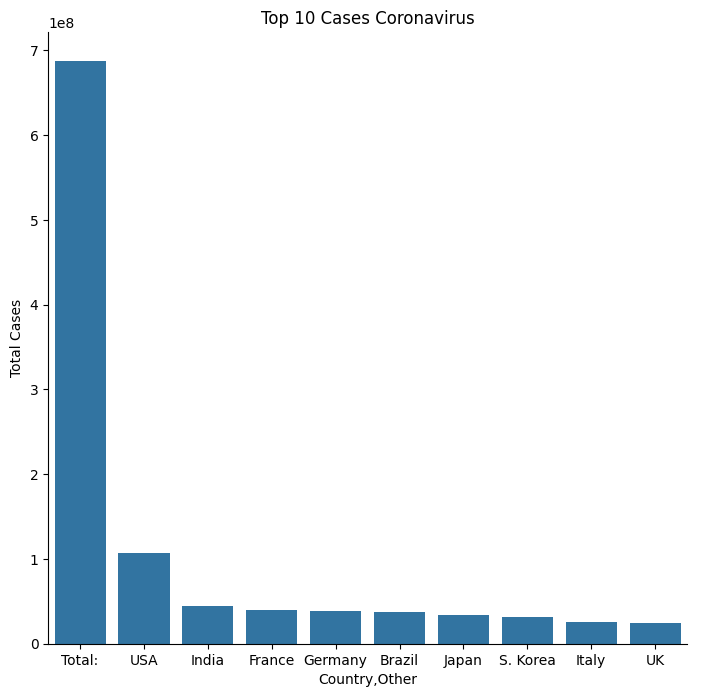

In [ ]:
top_cases = data.sort_values('Total Cases', ascending=False).head(10)
sns.catplot(data = top_cases, x='Country,Other', y = 'Total Cases', kind='bar', height=7).set(title="Top 10 Cases Coronavirus")
plt.show()

# Data cleaning


*  we dropped the cloumns(features) with hieghst number of missing values to increase the accuracy of prediction
*   and for the features with less number of missin values(under 100 missing value) we use the Forward fill to replace the missing values with the first non empty value before it



In [ ]:
data = data.drop(columns=['New Cases', 'New Deaths','New Recovered','Serious,Critical'])

In [ ]:
data['Total Deaths'] = data['Total Deaths'].fillna(method='ffill')
data['Total Recovered'] = data['Total Recovered'].fillna(method='ffill')
data['Active Cases'] = data['Active Cases'].fillna(method='ffill')
#data['TotalCases/1MPOP'] = data['TotalCases/1MPOP'].fillna(method='ffill')
data['Deaths/1M pop'] = data['Deaths/1M pop'].fillna(method='ffill')
data['Total Tests'] = data['Total Tests'].fillna(method='ffill')
data['Tests/1M pop'] = data['Tests/1M pop'].fillna(method='ffill')
data['Population'] = data['Population'].fillna(method='ffill')

In [ ]:
data.isnull().sum()

Country,Other       0
Total Cases         0
Total Deaths        0
Total Recovered     0
Active Cases        0
Tot Cases/1M pop    0
Deaths/1M pop       0
Total Tests         0
Tests/1M pop        0
Population          0
dtype: int64

In [ ]:
data.head()

(231, 10)

# Linear Regression - Corona Virus - Predict Total Cases

Our goal is to use the population, tests, active cases, total recovered and total deaths as features to predict the total cases in a country.

The data is from Kaggle, "Corona virus latest data 2023", data shape is (231, 10). It consists of Total Cases which is our goal, and the rest of the features mentioned above.

Some features were dropped as they had > 90% null values.

We'll try Decision Tree Regressor, Random Forest and finally Linear Regression.

1. Choose the column to predict and save it in variable called y
1. Choose the features and save the dataframe in variable called X
1. Split both into training and validation sets
1. Define and fit the three models mentioned above
1. Predict and evaluate the three models

In [ ]:
# Import all splitter and error metric
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

# Import models to try
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [ ]:
data.describe()

,Total Cases,Total Deaths,Total Recovered,Active Cases,Deaths/1M pop,Total Tests,Tests/1M pop,Population
count,2.310000e+02,2.310000e+02,2.310000e+02,2.310000e+02,231.000000,2.310000e+02,2.310000e+02,2.310000e+02
mean,5.948240e+06,5.942438e+04,5.628289e+06,1.707139e+05,1216.257576,3.020468e+07,1.969538e+06,3.439366e+07
std,4.603334e+07,4.619020e+05,4.420890e+07,1.564713e+06,1283.843137,1.145785e+08,3.537129e+06,1.380709e+08
min,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.572750e+04,1.855000e+02,1.268550e+04,2.150000e+01,139.500000,2.260585e+05,8.458000e+04,4.281115e+05
50%,2.091910e+05,1.971000e+03,1.356720e+05,7.290000e+02,781.000000,1.689184e+06,7.173800e+05,5.554960e+06
75%,1.330787e+06,1.428700e+04,1.284721e+06,9.484000e+03,1964.000000,1.148478e+07,2.122825e+06,2.183934e+07
max,6.870217e+08,6.863517e+06,6.595521e+08,2.060610e+07,6535.000000,1.176835e+09,2.330212e+07,1.448471e+09


In [ ]:
data.head(100)

,"Country,Other",Total Cases,Total Deaths,Total Recovered,Active Cases,Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population
0,USA,106627427.0,1159824.0,104549551.0,918052.0,318476,3464.0,1.176835e+09,3514983.0,3.348053e+08
1,India,44939515.0,531508.0,44356693.0,51314.0,31948,378.0,9.264966e+08,658663.0,1.406632e+09
2,France,39980570.0,166556.0,39677000.0,137014.0,609604,2540.0,2.714902e+08,4139547.0,6.558452e+07
3,Germany,38403667.0,173044.0,38192900.0,37723.0,457821,2063.0,1.223324e+08,1458359.0,8.388360e+07
4,Brazil,37449418.0,701494.0,36249161.0,498763.0,173897,3257.0,6.377617e+07,296146.0,2.153536e+08
...,...,...,...,...,...,...,...,...,...,...
95,Armenia,448980.0,8746.0,435162.0,5072.0,151072,2943.0,3.242901e+06,1091164.0,2.971966e+06
96,Bosnia and Herzegovina,402804.0,16336.0,379084.0,7384.0,123966,5028.0,1.884721e+06,580036.0,3.249317e+06
97,Oman,399449.0,4628.0,384669.0,10152.0,75028,869.0,2.500000e+07,4695724.0,5.323993e+06
98,North Macedonia,348057.0,9672.0,337068.0,1317.0,167230,4647.0,2.226216e+06,1069626.0,2.081304e+06


In [ ]:
# Set prediction target
y = data['Total Cases']

# Set features to base prediction on
features = ['Total Deaths', 'Total Recovered', 'Active Cases', 'Deaths/1M pop', 'Total Tests', 'Tests/1M pop', 'Population']
X = data[features]

# Split the data into training and validation sets
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.2, random_state=1)

# Define the three regression models we'll test
dt_regr = DecisionTreeRegressor(random_state=1)
rf_regr = RandomForestRegressor(random_state=1)
lin_regr = LinearRegression()

# Train the models
dt_regr.fit(train_X, train_y)
rf_regr.fit(train_X, train_y)
lin_regr.fit(train_X, train_y)

# Prediction and evaluation of each using mean absolute error
dt_pred = dt_regr.predict(val_X)
rf_pred = rf_regr.predict(val_X)
lin_pred = lin_regr.predict(val_X)

dt_mae = mean_absolute_error(val_y, dt_pred)
rf_mae = mean_absolute_error(val_y, rf_pred)
lin_mae = mean_absolute_error(val_y, lin_pred)

print("Validation MAE for Decision Tree Model: {:.2f}".format(dt_mae))
print("Validation MAE for Random Forest Model: {:.2f}".format(rf_mae))
print("Validation MAE for Linear Regression Model: {:.2f}".format(lin_mae))

Validation MAE for Decision Tree Model: 1800709.04
Validation MAE for Random Forest Model: 2064351.45
Validation MAE for Linear Regression Model: 332483.87


# Conclusion

The predictions from the Decision Tree, and Random Forest models were very far off and each had an error close to 2 millions, which in our data is unacceptable.

The Linear Regression did way better as the error is close to 300k, but still, is also bad for any practical purpose.

The data features in this file are mostly unrelated to the spread of the virus across the pandemic, better features would be percentage of vaccinated people, percentage of facemask wearers and a numeric value for how hard the goverment enfored pandemic laws. This is what I think caused the models to fail, and why choosing the right data to collect is as important as choosing the model.